In [2]:
###This is the Data Cleaning, visualization and trasnformation part of the project! 


In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 
import scipy 
from scipy.stats.stats import spearmanr 
from scipy.stats import pearsonr 
import seaborn as sb
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

#import os
#os.environ['PATH'].split(';')

In [2]:
# Uploading the yelp bussiness file
Yelp = pd.read_csv (r'Ahmed Project\yelp_business.csv')
Yelp.head()


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [3]:
# chekcing for null values 

null_columns=Yelp.columns[Yelp.isnull().any()]
Yelp[null_columns].isnull().sum()


neighborhood    106552
city                 1
state                1
postal_code        623
latitude             1
longitude            1
dtype: int64

In [4]:
# keeping only the columns we want and drop the null values

Yelp= Yelp[['name','address','city','state','stars','review_count','is_open','categories']]
Yelp = Yelp.dropna(subset=['city', 'state'])
Yelp.head()

,name,address,city,state,stars,review_count,is_open,categories
0,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,3.0,9,0,Sporting Goods;Shopping
4,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [33]:
# cheking for duplicate values and drop them 

Yelp.duplicated().sum()
Yelp.drop_duplicates().head()

,name,address,city,state,stars,review_count,is_open,categories
0,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,3.0,9,0,Sporting Goods;Shopping
4,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [6]:
# Understanding the data more we look at the top 5 numerical values when per city
Yelp_group=Yelp.groupby(Yelp['city'])
Yelp_group.mean().head()

,stars,review_count,is_open
city,,,
110 Las Vegas,5.00,63.0,1.0
AGINCOURT,2.50,6.0,1.0
Aberdour,4.00,4.0,1.0
Aberlady,4.25,3.5,1.0
Ahwahtukee,5.00,15.0,1.0


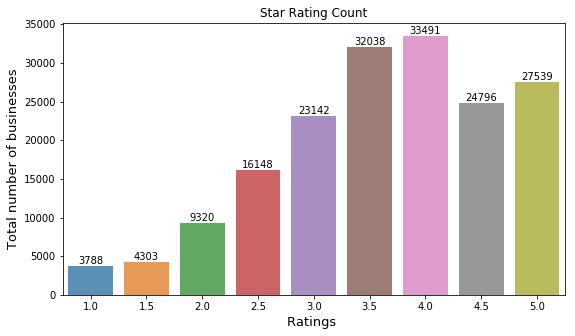

In [7]:
# Plotting the values for top 10 cities with the most reviews. 

plot_ratings=Yelp['stars'].value_counts()
plot_ratings=plot_ratings.sort_index()
plt.figure(figsize=(9,5))

x= sns.barplot(plot_ratings.index, plot_ratings.values, alpha=0.8)
plt.title("Star Rating Count")
plt.ylabel('Total number of businesses', fontsize=13)
plt.xlabel('Ratings ', fontsize=13)

values = x.patches
labels = plot_ratings.values
for value, label in zip(values, labels):
    height = value.get_height()
    x.text(value.get_x() + value.get_width()/2, height + 6, label, ha='center', va='bottom')

plt.show()



There are  59106  different types/categories of Businesses in Yelp!


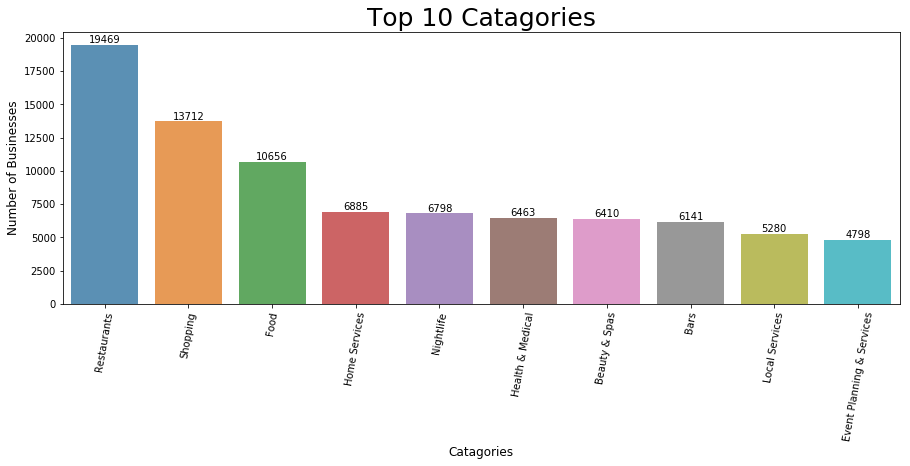

In [8]:
# Seperating the catagories and Plotting the values for top 10 catagories with the most number of bussiness.


catagories=' '.join(Yelp['categories'])

new_catagories=pd.DataFrame(catagories.split(';'),columns=['category'])
x=new_catagories.category.value_counts()

print("There are ",len(x)," different types/categories of Businesses in Yelp!")

x=x.sort_values(ascending=False)
x=x.iloc[0:10]


plt.figure(figsize=(15,5))
plot = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Top 10 Catagories",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Number of Businesses', fontsize=12)
plt.xlabel('Catagories', fontsize=12)

rects = plot.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()


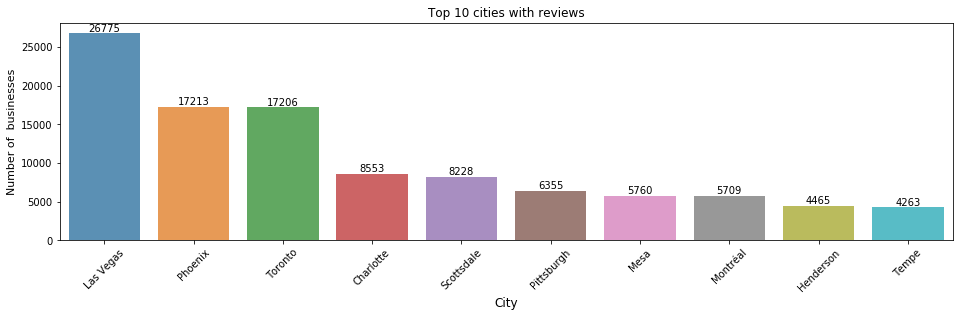

In [8]:
# Plotting the values for top 10 cities with the most number of bussiness.


city=Yelp['city'].value_counts()
city=city.sort_values(ascending=False)
city=city.iloc[0:10]

plt.figure(figsize=(16,4))
x = sns.barplot(city.index, city.values, alpha=0.8)
plt.title("Top 10 cities with reviews")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Number of  businesses', fontsize=11)
plt.xlabel('City', fontsize=12)

values = x.patches
labels = city.values
for value, label in zip(values, labels):
    height = value.get_height()
    x.text(value.get_x() + value.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [9]:
#undertsanding the top forst 10 cities stats by understainf the reviews mi/max and the amount of review per each city 

city=Yelp['city']
stars=Yelp['stars']#.sort_values(ascending=False)
concat=pd.concat([city,stars], axis=1, ignore_index=True)
concat.columns = ['City', 'Stars']
concat
Rate_for_city = concat.groupby('City').agg({'Stars': ['mean', 'min', 'max','count']}).reset_index()
Rate_for_city=Rate_for_city.sort_values('City', ascending=True)
Rate_for_city.iloc[0:10]
#Rate_for_city = concat.groupby((['City']),as_index=False)['Stars'].agg('count')

City    Stars                
                                   mean  min  max count
0                110 Las Vegas  5.00000  5.0  5.0     1
1                    AGINCOURT  2.50000  2.5  2.5     1
2                     Aberdour  4.00000  4.0  4.0     1
3                     Aberlady  4.25000  3.5  5.0     2
4                   Ahwahtukee  5.00000  5.0  5.0     1
5                    Ahwatukee  3.78125  1.5  5.0    16
6  Ahwatukee Foothills Village  5.00000  5.0  5.0     1
7                     Aichwald  3.50000  3.0  4.0     2
8                         Ajax  3.28373  1.0  5.0   252
9                       Alburg  5.00000  5.0  5.0     1

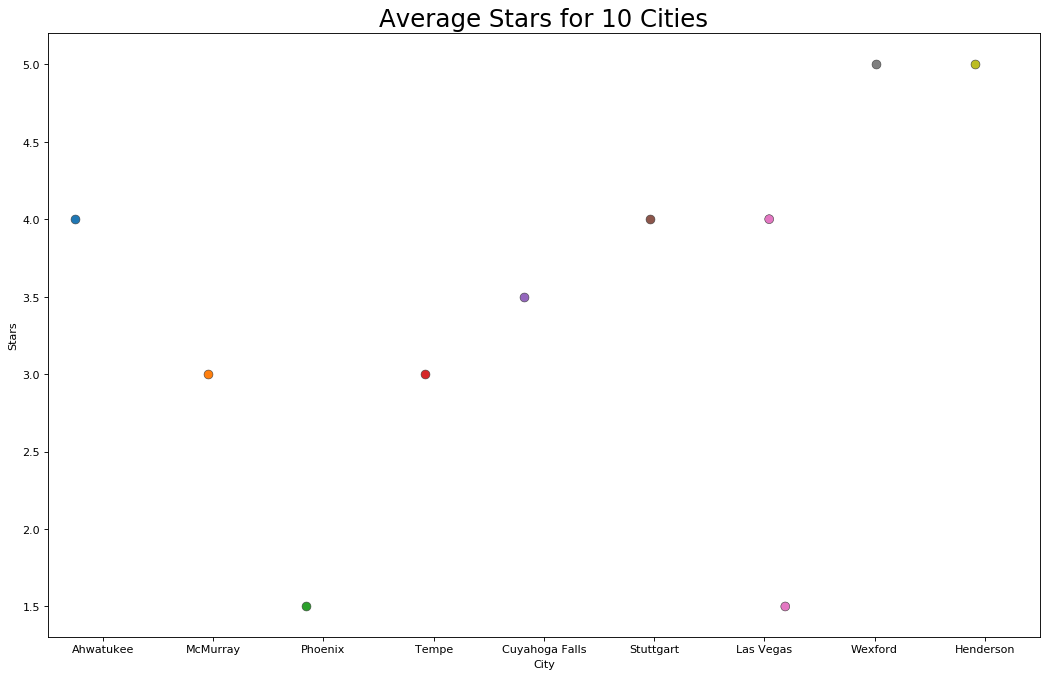

In [10]:
# Plotting random 10 cities and their average review. 
concat=concat.iloc[0:10]
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(concat.City, concat.Stars, jitter=0.25, size=8, ax=ax, linewidth=.5)

plt.title('Average Stars for 10 Cities', fontsize=22)
plt.show()            


In [11]:
# describing the summary stats of the data
Yelp.describe()

,stars,review_count,is_open
count,174565.000000,174565.000000,174565.000000
mean,3.632186,30.137307,0.840375
std,1.003739,98.208709,0.366259
min,1.000000,3.000000,0.000000
25%,3.000000,4.000000,1.000000
50%,3.500000,8.000000,1.000000
75%,4.500000,23.000000,1.000000
max,5.000000,7361.000000,1.000000


In [34]:
# describing the summary stats of the data

x=Yelp.groupby('city')
x.describe().head()

is_open                                    review_count        \
                count mean  std  min  25%  50%  75%  max        count  mean   
city                                                                          
110 Las Vegas     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0          1.0  63.0   
AGINCOURT         1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0          1.0   6.0   
Aberdour          1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0          1.0   4.0   
Aberlady          2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0          2.0   3.5   
Ahwahtukee        1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0          1.0  15.0   

              ...               stars                                          \
              ...     75%   max count  mean      std  min    25%   50%    75%   
city          ...                                                               
110 Las Vegas ...   63.00  63.0   1.0  5.00      NaN  5.0  5.000  5.00  5.000   
AGINCOURT     ...    6.00   6.0   1.0  2.50      NaN  2.5  2.500  2.50  2.500   
Aberdour      ...    4.00   4.0   1.0  4.00      NaN  4.0  4.000  4.00  4.000   
Aberlady      ...    3.75   4.0   2.0  4.25  1.06066  3.5  3.875  4.25  4.625   
Ahwahtukee    ...   15.00  15.0   1.0  5.00      NaN  5.0  5.000  5.00  5.000   

                    
               max  
city                
110 Las Vegas  5.0  
AGINCOURT      2.5  
Aberdour       4.0  
Aberlady       5.0  
Ahwahtukee     5.0  

[5 rows x 24 columns]

In [13]:
# obtianing the pairplots for the data
x=Yelp[['city','stars','state']]
sb.pairplot(x)


In [14]:
# determing if there is any correlation in the data.
corr=Yelp.corr()
corr



,stars,review_count,is_open
stars,1.000000,0.030117,0.051794
review_count,0.030117,1.000000,0.035368
is_open,0.051794,0.035368,1.000000


In [15]:
# plotting the heat map for the corr
sb.heatmap(corr,xticklabels=corr.values, yticklabels=corr.columns.values)

In [35]:
# dterming the p value for catagorical varibales 
state=Yelp['state']
state = state.dropna
stars=Yelp['stars']
stars = stars.dropna
spearmanr_coefficient, p_value= spearmanr(state,stars)

In [30]:
# Testing out some normlization test methods 


#seed(1)
#pyplot.hist(x)
#pyplot.show()

#qqplot(x, line='s')
#pyplot.show()

#stat, p = shapiro(x)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
#interpret
#alpha = 0.05
#if p > alpha:
#    print('Sample looks Gaussian (fail to reject H0)')
#else:
#    print('Sample does not look Gaussian (reject H0)')

In [29]:
# Test out tranformation 

#x.transform([np.sqrt, np.exp])
